# <center> BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:

    •	Variable: Definition
    •	ID: Unique client ID
    •	age: Age of the client
    •	job: Type of job
    •	marital: Marital status of the client
    •	education: Education level
    •	default: Credit in default.
    •	housing: Housing loan
    •	loan: Personal loan
    •	contact: Type of communication
    •	month: Contact month
    •	day_of_week: Day of week of contact
    •	duration: Contact duration
    •	campaign: number of contacts performed during this campaign to the client
    •	pdays: number of days that passed by after the client was last contacted
    •	previous: number of contacts performed before this campaign
    •	poutcome: outcome of the previous marketing campaign
Output variable (desired target):

    •	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


### Retriving Dataset

In [2]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
print(data.head(5))


      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

### 1: Performed EDA (with proper visualization)

In [2]:
data.shape

(31647, 18)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
# Check for missing values
print(data.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [5]:
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
data = pd.read_csv('termdeposit_train.csv')

# Define a dictionary to map 'no' to 0 and 'yes' to 1
mapping = {'no': 0, 'yes': 1}

# Apply the mapping to relevant columns
columns_to_map = ['default', 'housing', 'loan']
data[columns_to_map] = data[columns_to_map].replace(mapping)

# Define a LabelEncoder object
label_encoder = LabelEncoder()

# Define custom mapping for months
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Map month column
data['month'] = data['month'].map(month_mapping)

# Define columns to label encode
columns_to_encode = ['job', 'marital', 'contact', 'education', 'poutcome']

# Apply label encoding to selected columns
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Display unique values after encoding and mapping
for col in data.columns:
    print(f"Unique values of {col}:")
    print(data[col].unique())
    print()

# Save the modified dataset back to the original CSV file
data.to_csv('termdeposit_train_encoded.csv', index=False)


Unique values of ID:
[26110 40576 15320 ... 19710 38556 14156]

Unique values of age:
[56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90]

Unique values of job:
[ 0 11  7  4  9  5  1  3  6  8  2 10]

Unique values of marital:
[1 0 2]

Unique values of education:
[3 1 2 0]

Unique values of default:
[0 1]

Unique values of balance:
[1933    3  891 ... 2787 8741 2968]

Unique values of housing:
[0 1]

Unique values of loan:
[0 1]

Unique values of contact:
[1 0 2]

Unique values of day:
[19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31 23]

Unique values of month:
[11  7  6  2  9  1  5  8  4 10  3 12]

Unique values of duration:
[  44   91  240 ...  939  839 1973]

Unique values of campaign:
[ 2  1  3  4  7  5 33 12  8  9  6 24 17 11 20 25 19 29 21 10 27 38 16 18
 14 3

In [8]:
df = pd.read_csv('termdeposit_train_encoded.csv')
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,11,44,2,-1,0,3,no
1,40576,31,11,1,1,0,3,0,0,0,20,7,91,2,-1,0,3,no
2,15320,27,7,1,1,0,891,1,0,0,18,7,240,1,-1,0,3,no
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,yes
4,29842,31,9,1,1,0,119,1,0,0,4,2,380,1,-1,0,3,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  int64 
 3   marital     31647 non-null  int64 
 4   education   31647 non-null  int64 
 5   default     31647 non-null  int64 
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  int64 
 8   loan        31647 non-null  int64 
 9   contact     31647 non-null  int64 
 10  day         31647 non-null  int64 
 11  month       31647 non-null  int64 
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  int64 
 17  subscribed  31647 non-null  object
dtypes: int64(17), object(1)
memory usage: 4.3+ MB


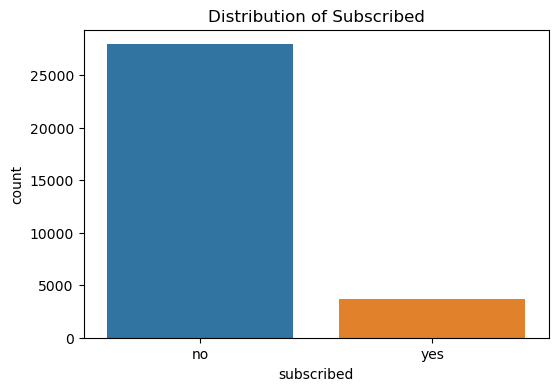

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='subscribed', data=df)
plt.title('Distribution of Subscribed')
plt.show()

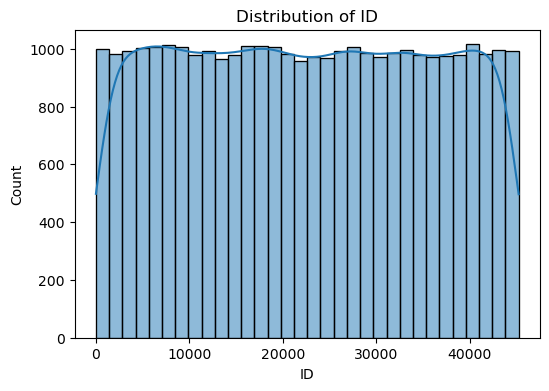

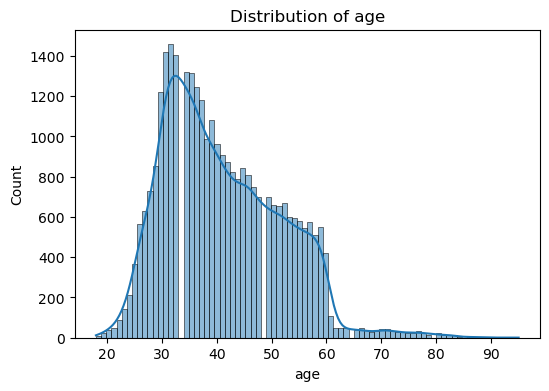

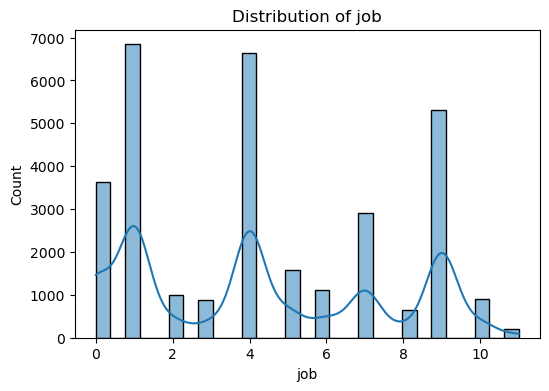

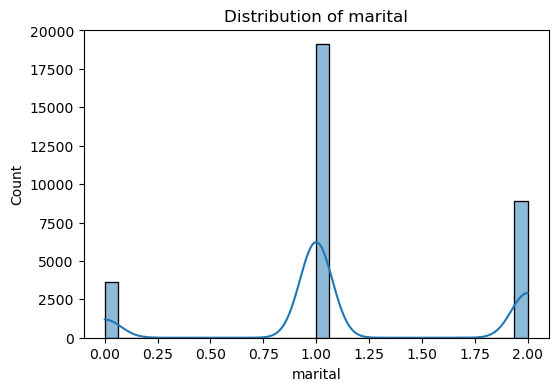

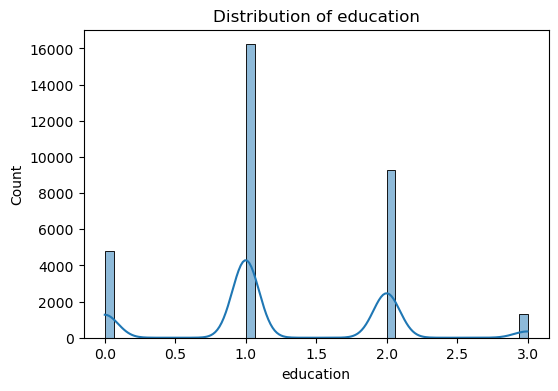

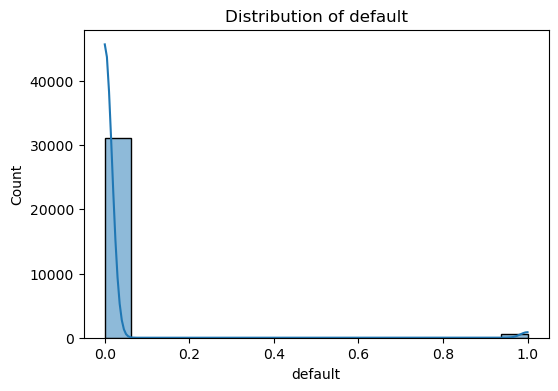

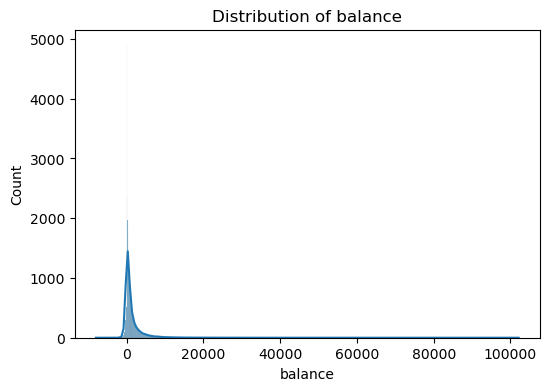

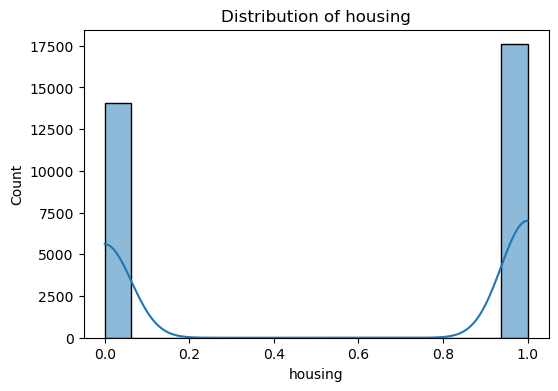

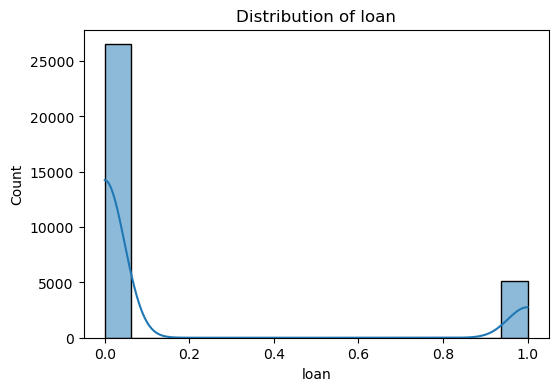

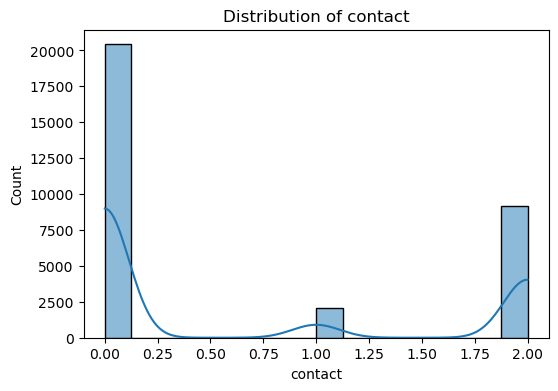

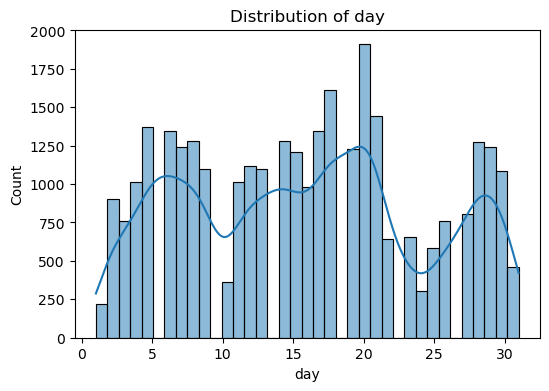

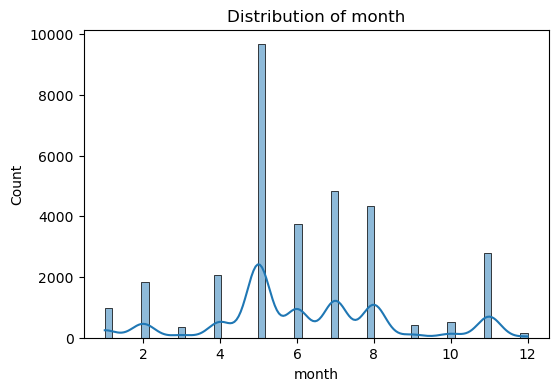

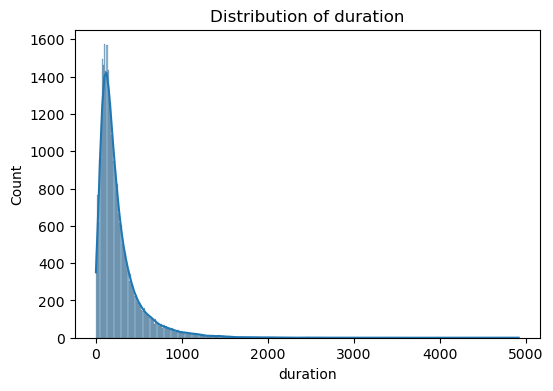

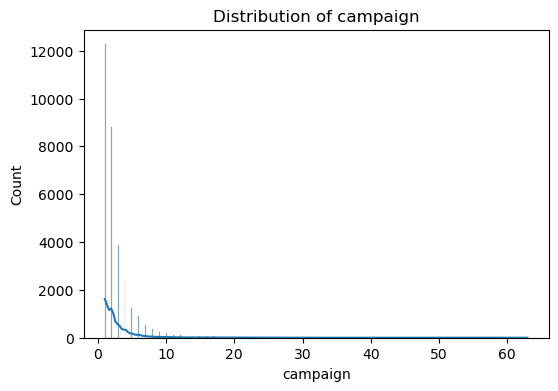

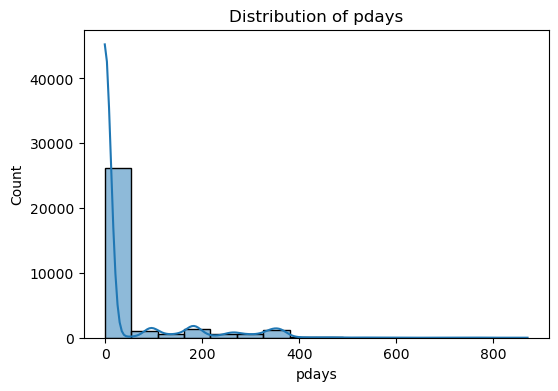

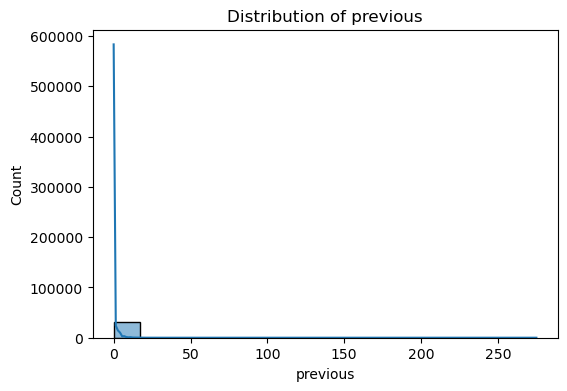

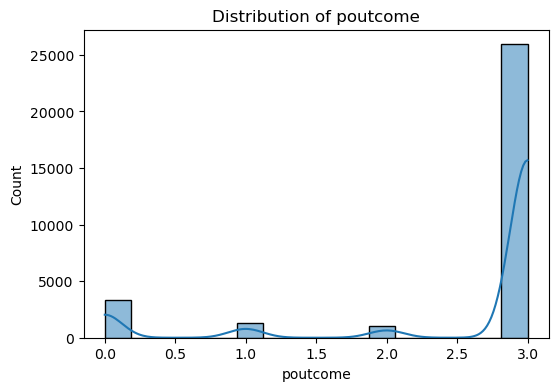

In [11]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



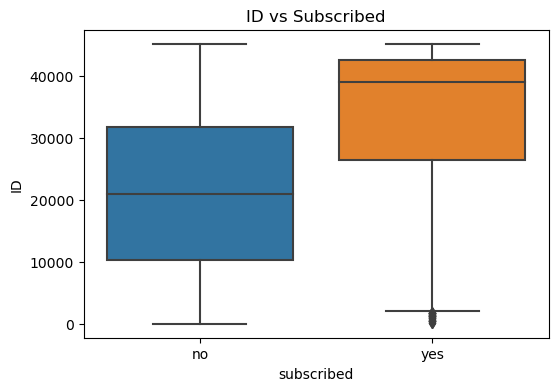

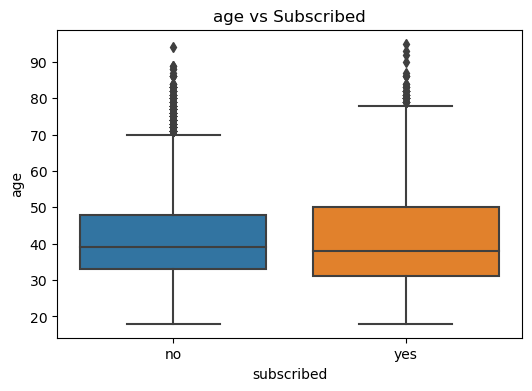

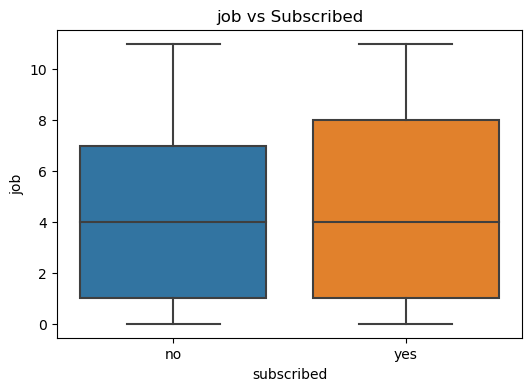

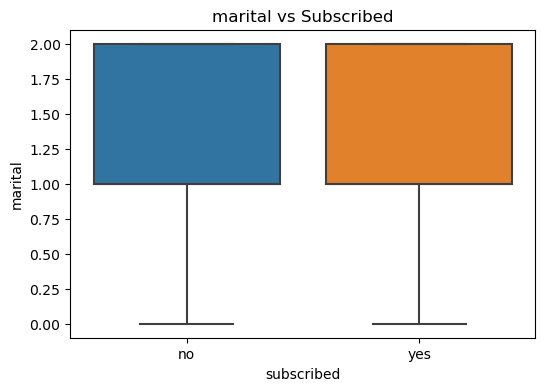

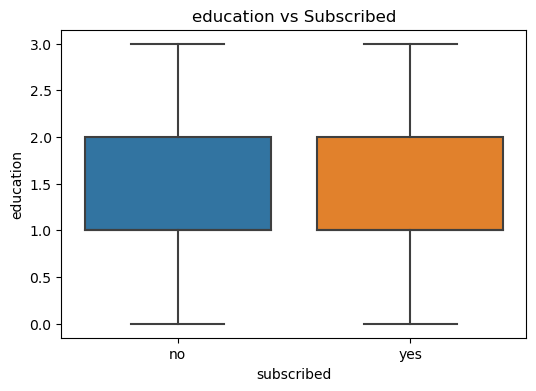

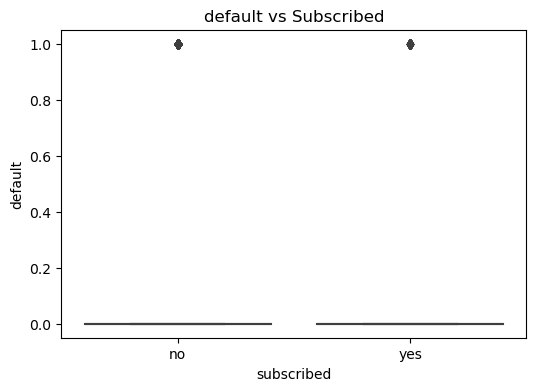

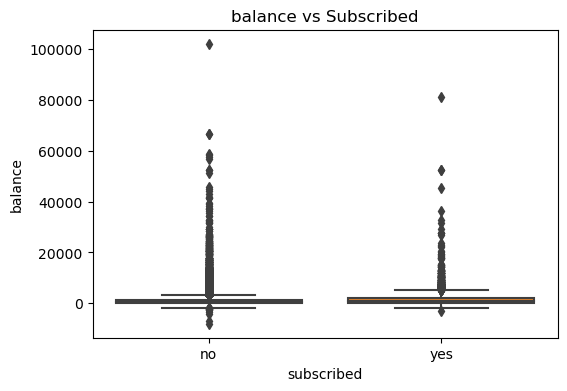

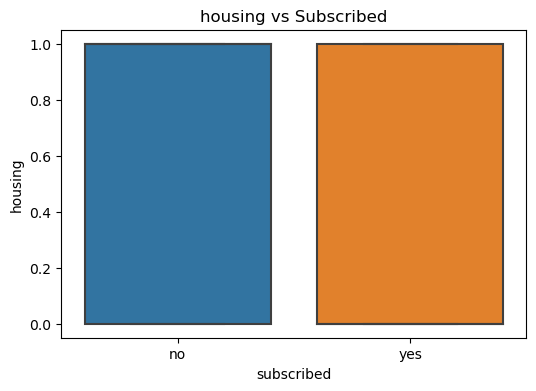

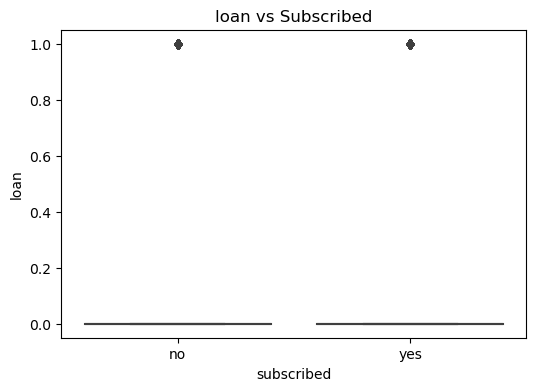

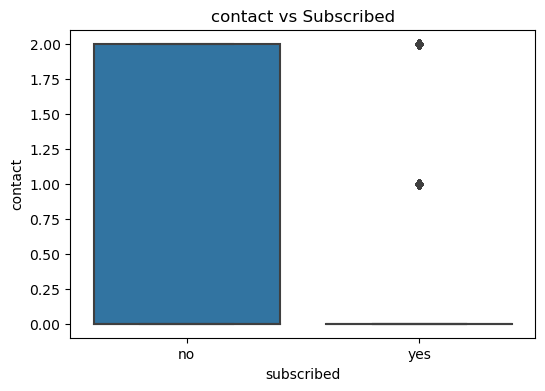

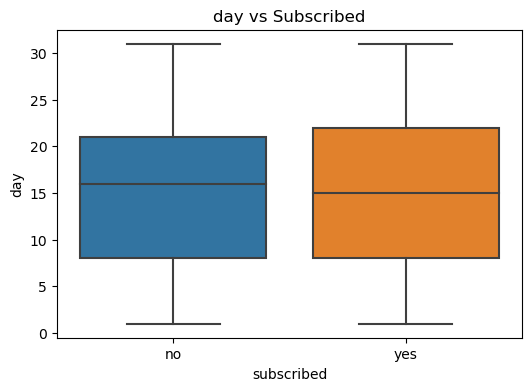

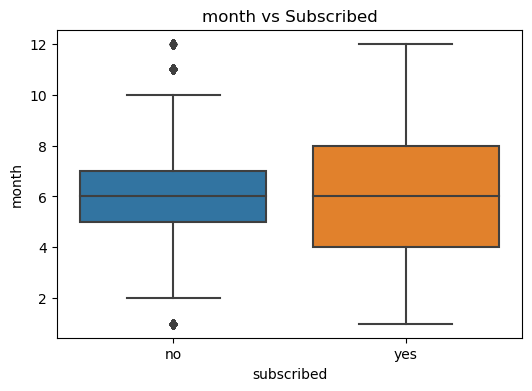

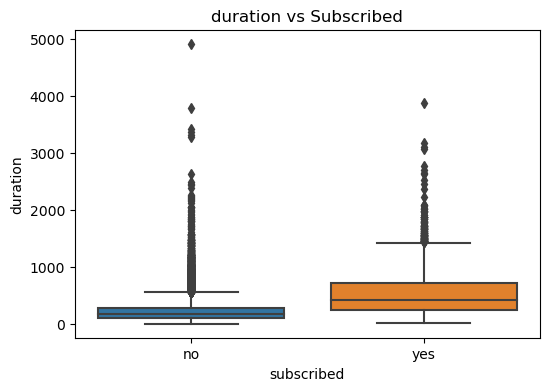

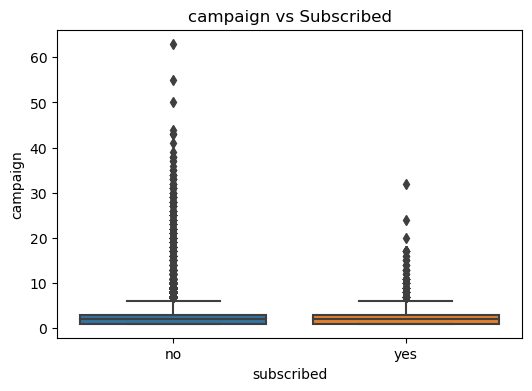

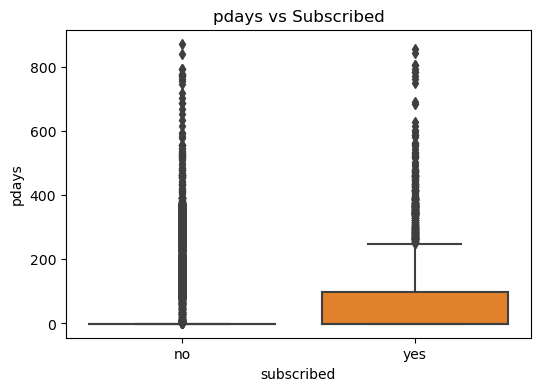

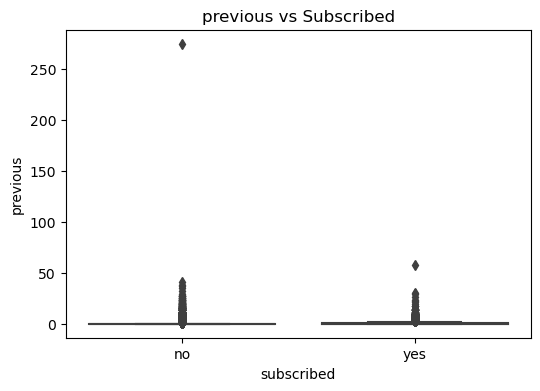

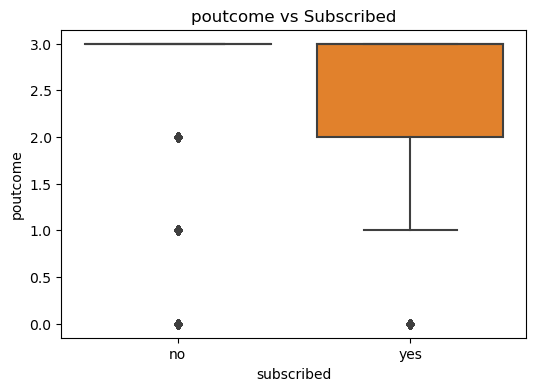

In [12]:
# Relationship between numerical features and the target variable
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='subscribed', y=col, data=df)
    plt.title(f'{col} vs Subscribed')
    plt.show()


### 2: Check outliers if present remove it

In [13]:
# Check outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

# Print summary after removing outliers
print("Summary after removing outliers:")
print(df_no_outliers.describe())

Summary after removing outliers:
                 ID           age           job       marital     education  \
count  16003.000000  16003.000000  16003.000000  16003.000000  16003.000000   
mean   19715.983691     40.378741      4.352121      1.172530      1.212710   
std    12698.188122      9.908283      3.305535      0.610527      0.757825   
min        2.000000     18.000000      0.000000      0.000000      0.000000   
25%     8473.500000     32.000000      1.000000      1.000000      1.000000   
50%    19093.000000     39.000000      4.000000      1.000000      1.000000   
75%    30316.500000     48.000000      7.000000      2.000000      2.000000   
max    45210.000000     70.000000     11.000000      2.000000      3.000000   

       default       balance       housing     loan       contact  \
count  16003.0  16003.000000  16003.000000  16003.0  16003.000000   
mean       0.0    658.448228      0.552021      0.0      0.786353   
std        0.0    841.991015      0.497302      

C:\Users\AADERSHI MOHAN\AppData\Local\Temp\ipykernel_8744\1698684633.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\AADERSHI MOHAN\AppData\Local\Temp\ipykernel_8744\1698684633.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\AADERSHI MOHAN\AppData\Local\Temp\ipykernel_8744\1698684633.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)

### 3: Check multicollinearity if present rewove it

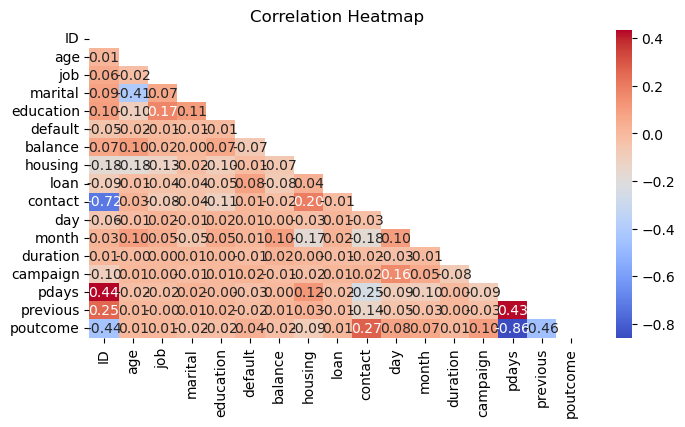

{'poutcome', 'contact'}
Summary after removing multicollinearity:
                 ID           age           job       marital     education  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247      4.332923      1.167220      1.225013   
std    13075.936990     10.625134      3.271868      0.607186      0.749195   
min        2.000000     18.000000      0.000000      0.000000      0.000000   
25%    11218.000000     33.000000      1.000000      1.000000      1.000000   
50%    22519.000000     39.000000      4.000000      1.000000      1.000000   
75%    33879.500000     48.000000      7.000000      2.000000      2.000000   
max    45211.000000     95.000000     11.000000      2.000000      3.000000   

            default        balance       housing          loan           day  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean       0.018485    1363.890258      0.555629      0.162132

In [14]:
import numpy as np

# # Calculate the correlation matrix
correlation_matrix = df.drop('subscribed', axis=1).corr()

# # Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Find features with high correlation
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print(high_corr_features)

# Remove highly correlated features
df_no_multicollinearity = df.drop(high_corr_features, axis=1)

# Print summary after removing multicollinearity
print("Summary after removing multicollinearity:")
print(df_no_multicollinearity.describe())


### 4: Check Skewness, remove

In [15]:
# Check skewness for each feature
skewness = df.drop('subscribed', axis=1).skew()

# Remove features with high skewness
high_skewness_features = skewness[abs(skewness) > 1].index
df_no_skewness = df.drop(high_skewness_features, axis=1)

# print(high_skewness_features)
print(df_no_skewness.columns)

Index(['ID', 'age', 'job', 'marital', 'education', 'housing', 'contact', 'day',
       'month', 'subscribed'],
      dtype='object')


### 5: Use Standard Scaling

In [16]:
# Preprocessing (if needed)
# Example: scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('subscribed', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns= df.columns[:-1])
df_scaled.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.271192,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.187933,-1.118201,-0.439893,0.395076,0.379579,2.016957,-0.832754,-0.245906,-0.408555,-0.237059,0.441777
1,1.377516,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.449397,-1.118201,-0.439893,-0.716695,0.499526,0.354571,-0.649957,-0.245906,-0.408555,-0.237059,0.441777
2,-0.554001,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,-0.156159,0.894294,-0.439893,-0.716695,0.259631,0.354571,-0.070449,-0.567059,-0.408555,-0.237059,0.441777
3,1.636469,1.509911,-0.101755,-1.922374,1.034442,-0.137234,0.635055,-1.118201,-0.439893,-0.716695,0.739422,-0.061026,2.368149,-0.567059,0.447299,1.001336,-0.576498
4,0.556606,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.411091,0.894294,-0.439893,-0.716695,-1.419637,-1.723412,0.474054,-0.567059,-0.408555,-0.237059,0.441777


### 6. Check VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
X = df.drop('subscribed', axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
      Feature        VIF
0          ID   9.156747
1         age  15.130523
2         job   2.848439
3     marital   5.080030
4   education   3.795013
5     default   1.032774
6     balance   1.251894
7     housing   2.396327
8        loan   1.218713
9     contact   3.197392
10        day   4.642472
11      month   7.653427
12   duration   2.006444
13   campaign   1.871548
14      pdays   3.630530
15   previous   1.345778
16   poutcome  19.860673


### 7: Apply feature scalling method on numerical feature

In [18]:
from sklearn.preprocessing import StandardScaler

# Separate numerical features
numerical_features = df.drop('subscribed', axis=1)

# Apply Standardization to numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Concatenate scaled features with the target variable 'subscribed'
df_scaled['subscribed'] = df['subscribed']

# Print the first few rows of the scaled DataFrame
print("Scaled DataFrame:")
print(df_scaled.head())

Scaled DataFrame:
         ID       age       job   marital  education   default   balance  \
0  0.271192  1.415793 -1.324317 -0.275405   2.369229 -0.137234  0.187933   
1  1.377516 -0.937156  2.037729 -0.275405  -0.300345 -0.137234 -0.449397   
2 -0.554001 -1.313627  0.815167 -0.275405  -0.300345 -0.137234 -0.156159   
3  1.636469  1.509911 -0.101755 -1.922374   1.034442 -0.137234  0.635055   
4  0.556606 -0.937156  1.426448 -0.275405  -0.300345 -0.137234 -0.411091   

    housing      loan   contact       day     month  duration  campaign  \
0 -1.118201 -0.439893  0.395076  0.379579  2.016957 -0.832754 -0.245906   
1 -1.118201 -0.439893 -0.716695  0.499526  0.354571 -0.649957 -0.245906   
2  0.894294 -0.439893 -0.716695  0.259631  0.354571 -0.070449 -0.567059   
3 -1.118201 -0.439893 -0.716695  0.739422 -0.061026  2.368149 -0.567059   
4  0.894294 -0.439893 -0.716695 -1.419637 -1.723412  0.474054 -0.567059   

      pdays  previous  poutcome subscribed  
0 -0.408555 -0.237059  0.4417

### 8: Resampling to balance the class(if problem is classification)

In [19]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separate features and target variable
X = df.drop('subscribed', axis=1)
y = df['subscribed']

# Instantiate oversampler and undersampler
oversampler = RandomOverSampler(sampling_strategy='minority')
undersampler = RandomUnderSampler(sampling_strategy='majority')

# Oversampling
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)
print('Class distribution after oversampling:', Counter(y_resampled_over))

# Undersampling
X_resampled_under, y_resampled_under = undersampler.fit_resample(X, y)
print('Class distribution after undersampling:', Counter(y_resampled_under))


Class distribution after oversampling: Counter({'no': 27932, 'yes': 27932})
Class distribution after undersampling: Counter({'no': 3715, 'yes': 3715})


### 9: Apply feature selection method

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df.drop('subscribed', axis=1)
y = df['subscribed']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PCA
pca = PCA(n_components=5)  # Select top 5 principal components

# Fit PCA to training data and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier (e.g., RandomForest) on the transformed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with PCA-selected features:", accuracy)


Accuracy with PCA-selected features: 0.9077409162717219


### 10: Split the data into feature and target variable x and y

In [21]:
# Split the data into feature variables (X) and target variable (y)
X = df.iloc[:, :-1]  # Features are all columns except the last one
y = df.iloc[:, -1]   # Target variable is the last column

# Display the first few rows of X and y
print("Feature variables (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Feature variables (X):
      ID  age  job  marital  education  default  balance  housing  loan  \
0  26110   56    0        1          3        0     1933        0     0   
1  40576   31   11        1          1        0        3        0     0   
2  15320   27    7        1          1        0      891        1     0   
3  43962   57    4        0          2        0     3287        0     0   
4  29842   31    9        1          1        0      119        1     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  
0        1   19     11        44         2     -1         0         3  
1        0   20      7        91         2     -1         0         3  
2        0   18      7       240         1     -1         0         3  
3        0   22      6       867         1     84         3         2  
4        0    4      2       380         1     -1         0         3  

Target variable (y):
0     no
1     no
2     no
3    yes
4     no
Name: subscribed, dtype: ob

### 11: Divide data into 4 part, X_train, y_train, x_test, y_test by using train test split method

In [22]:
from sklearn.model_selection import train_test_split

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23735, 17)
y_train shape: (23735,)
X_test shape: (7912, 17)
y_test shape: (7912,)


### 12: Building models and checking cross validation score

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Build RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
# Calculate cross-validation scores for RandomForestClassifier
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5)

# Build GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)
# Calculate cross-validation scores for GradientBoostingClassifier
gb_cv_scores = cross_val_score(gb_clf, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores for RandomForestClassifier:", rf_cv_scores)
print("Mean cross-validation score for RandomForestClassifier:", rf_cv_scores.mean())
print("\nCross-validation scores for GradientBoostingClassifier:", gb_cv_scores)
print("Mean cross-validation score for GradientBoostingClassifier:", gb_cv_scores.mean())

Cross-validation scores for RandomForestClassifier: [0.91611374 0.91200632 0.90851635 0.91325644 0.90820035]
Mean cross-validation score for RandomForestClassifier: 0.9116186405415329

Cross-validation scores for GradientBoostingClassifier: [0.91342812 0.9121643  0.90820035 0.91309844 0.90804234]
Mean cross-validation score for GradientBoostingClassifier: 0.9109867090403835


### 13. Find Best Model

In [24]:
import warnings 
warnings.filterwarnings('ignore')

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42)
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean cross-validation score for {name}: {cv_scores.mean()}\n")

# Find the best model
best_model_name = max(models, key=lambda k: cross_val_score(models[k], X, y, cv=5).mean())
print(f"The best model is {best_model_name} with a mean cross-validation score of {cross_val_score(models[best_model_name], X, y, cv=5).mean()}")


Cross-validation scores for RandomForestClassifier: [0.91611374 0.91200632 0.90851635 0.91325644 0.90820035]
Mean cross-validation score for RandomForestClassifier: 0.9116186405415329

Cross-validation scores for GradientBoostingClassifier: [0.91342812 0.9121643  0.90820035 0.91309844 0.90804234]
Mean cross-validation score for GradientBoostingClassifier: 0.9109867090403835

Cross-validation scores for LogisticRegression: [0.89273302 0.8835703  0.8835519  0.88402591 0.88750198]
Mean cross-validation score for LogisticRegression: 0.8862766217943582

The best model is RandomForestClassifier with a mean cross-validation score of 0.9116186405415329


### 14: Hyper parameters tunning

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with best hyperparameters on the test set
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)
test_score = best_rf_clf.score(X_test, y_test)
print("Test Set Accuracy:", test_score)


Best Hyperparameters: {'n_estimators': 100}
Test Set Accuracy: 0.9089989888776542


### 15: Save the model by using joblib method

In [27]:
# Import joblib for model saving (for scikit-learn versions before 0.23)
from sklearn.ensemble import RandomForestClassifier
import joblib  # Import joblib directly

# Save the trained model
joblib.dump(best_rf_clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

### 16: Load the data by using joblib method

In [28]:
import joblib

# Load the trained model
loaded_model = joblib.load('random_forest_model.pkl')
print('Loaded Model', loaded_model)

Loaded Model RandomForestClassifier(random_state=42)


### 17: Use the test dataset file to predict the target variable

In [56]:
import pandas as pd
import joblib

# Read the test dataset file
test_data = pd.read_csv('termdeposit_test.csv')

# Preprocess the test data similarly to how it was preprocessed during training
# (including label encoding and mapping 'no' to 0 and 'yes' to 1)

# Define a LabelEncoder object
label_encoder = LabelEncoder()

# Define custom mapping for months
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Map month column
test_data['month'] = test_data['month'].map(month_mapping)

# Define columns to label encode
columns_to_encode = ['job', 'marital', 'contact', 'education', 'poutcome']

# Apply label encoding to selected columns
for col in columns_to_encode:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# Define a dictionary to map 'no' to 0 and 'yes' to 1
mapping = {'no': 0, 'yes': 1}

# Apply the mapping to relevant columns
columns_to_map = ['default', 'housing', 'loan']
test_data[columns_to_map] = test_data[columns_to_map].replace(mapping)

# Load the trained Random Forest model
best_rf_clf = joblib.load('random_forest_model.pkl')

# Extract features from the test data
X_test = test_data

# Make predictions using the loaded model
y_pred = best_rf_clf.predict(X_test)

# Print the predicted target variable values
print('Has the client subscribed a term deposit?  No/Yes')
print(y_pred)

Has the client subscribed a term deposit?  No/Yes
['no' 'no' 'no' ... 'no' 'yes' 'no']
